In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
edges = pd.read_csv(r"data\edges.csv") #load the edges
edges = edges[["# source"," target"]] #remove additional columns
edges_array = np.array(edges) #convert it to np.array

In [4]:
G = nx.DiGraph() #empty DiGraph
G.add_edges_from(edges_array) 

Node_map = pd.read_csv(r"data\nodes.csv",index_col=False) #creating a dict with node index to names
Node_map = Node_map[["# index"," name"]]
Node_map = dict(Node_map)
Node_mapper = Node_map[" name"] #the main dict which can link node_index to actual names


In [5]:
print(f"The graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges before data cleaning")

The graph has 58743 nodes and 108399 edges before data cleaning


In [6]:
#remove all nodes connecting to package 1, as it's empty
G.remove_node(1)

In [7]:
print(f"After removing node 1 we have {G.number_of_edges()} edges left")

After removing node 1 we have 72252 edges left


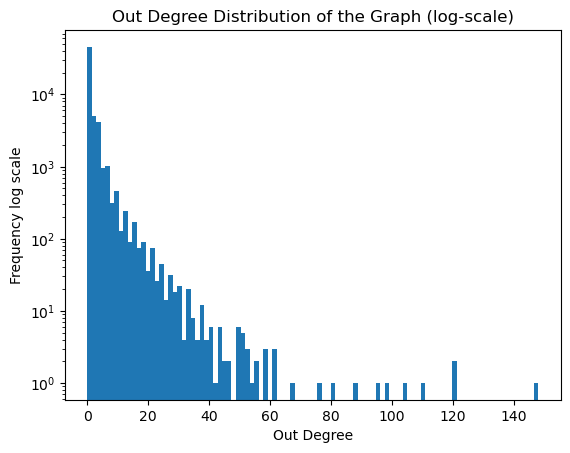

In [8]:
#drawing a out degree distribution
degree_dict_out = dict(G.out_degree())
vals_out = degree_dict_out.values()

plt.hist(vals_out,bins=100,log=True)
plt.xlabel("Out Degree")
plt.ylabel("Frequency log scale")
plt.title("Out Degree Distribution of the Graph (log-scale)")
plt.show()

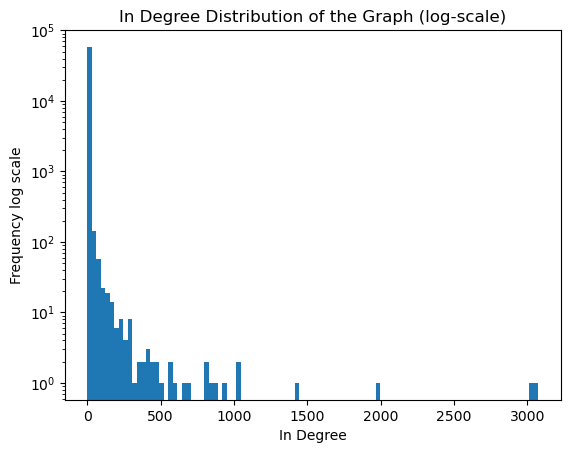

In [9]:
#drawing a in degree distribution
degree_dict_in = dict(G.in_degree())
vals_in = degree_dict_in.values()

plt.hist(vals_in,bins=100,log=True)
plt.xlabel("In Degree")
plt.ylabel("Frequency log scale")
plt.title("In Degree Distribution of the Graph (log-scale)")
plt.show()

In [10]:
Node_mapper[57]

'distribute'

In [14]:
print(f"There are {nx.number_of_selfloops(G)} self loops in the network")

There are 75 self loops in the network
